In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [6]:
# import some data to play with
Company = pd.read_csv('Company_Data.csv')

In [7]:
Company.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [8]:
Company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [9]:
Company.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [10]:
Company.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [11]:
Company['ShelveLoc'].value_counts()

Medium    219
Bad        96
Good       85
Name: ShelveLoc, dtype: int64

In [12]:
Company['Urban'].value_counts()

Yes    282
No     118
Name: Urban, dtype: int64

In [13]:
Company['US'].value_counts()

Yes    258
No     142
Name: US, dtype: int64

In [14]:
#Complete Company_Data dataset

label_encoder = preprocessing.LabelEncoder()

Company['ShelveLoc'] = label_encoder.fit_transform(Company['ShelveLoc'])
Company['Urban'] = label_encoder.fit_transform(Company['Urban'])
Company['US'] = label_encoder.fit_transform(Company['US'])
Company

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,0,42,17,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1
4,4.15,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,1,33,14,1,1
396,6.14,139,23,3,37,120,2,55,11,0,1
397,7.41,162,26,12,368,159,2,40,18,1,1
398,5.94,100,79,7,284,95,0,50,12,1,1


In [15]:
Company['ShelveLoc'].value_counts()

2    219
0     96
1     85
Name: ShelveLoc, dtype: int64

In [16]:
# changing target variable to catogerical data
Company["sales"]="small"
Company.loc[Company["Sales"]>7.49,"sales"]="large"
Company.drop(["Sales"],axis=1,inplace=True)
Company

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sales
0,138,73,11,276,120,0,42,17,1,1,large
1,111,48,16,260,83,1,65,10,1,1,large
2,113,35,10,269,80,2,59,12,1,1,large
3,117,100,4,466,97,2,55,14,1,1,small
4,141,64,3,340,128,0,38,13,1,0,small
...,...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,1,33,14,1,1,large
396,139,23,3,37,120,2,55,11,0,1,small
397,162,26,12,368,159,2,40,18,1,1,small
398,100,79,7,284,95,0,50,12,1,1,small


In [19]:
x=Company.iloc[:,0:10]
y=Company['sales']

In [20]:
x

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,138,73,11,276,120,0,42,17,1,1
1,111,48,16,260,83,1,65,10,1,1
2,113,35,10,269,80,2,59,12,1,1
3,117,100,4,466,97,2,55,14,1,1
4,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,1,33,14,1,1
396,139,23,3,37,120,2,55,11,0,1
397,162,26,12,368,159,2,40,18,1,1
398,100,79,7,284,95,0,50,12,1,1


In [21]:
y

0      large
1      large
2      large
3      small
4      small
       ...  
395    large
396    small
397    small
398    small
399    large
Name: sales, Length: 400, dtype: object

In [23]:
Company['sales'].unique()

array(['large', 'small'], dtype=object)

In [25]:
Company.sales.value_counts()

small    201
large    199
Name: sales, dtype: int64

In [26]:
colnames = list(Company.columns)
colnames

['CompPrice',
 'Income',
 'Advertising',
 'Population',
 'Price',
 'ShelveLoc',
 'Age',
 'Education',
 'Urban',
 'US',
 'sales']

In [27]:
# Splitting data into training and testing data set
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=40)

### Building Decision Tree Classifier using Entropy Criteria

In [28]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

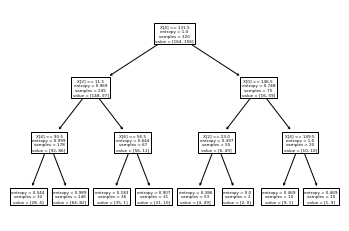

In [29]:
#PLot the decision tree
tree.plot_tree(model);

In [31]:
colnames = list(Company.columns)
colnames

['CompPrice',
 'Income',
 'Advertising',
 'Population',
 'Price',
 'ShelveLoc',
 'Age',
 'Education',
 'Urban',
 'US',
 'sales']

In [35]:
Company['sales'].value_counts()

small    201
large    199
Name: sales, dtype: int64

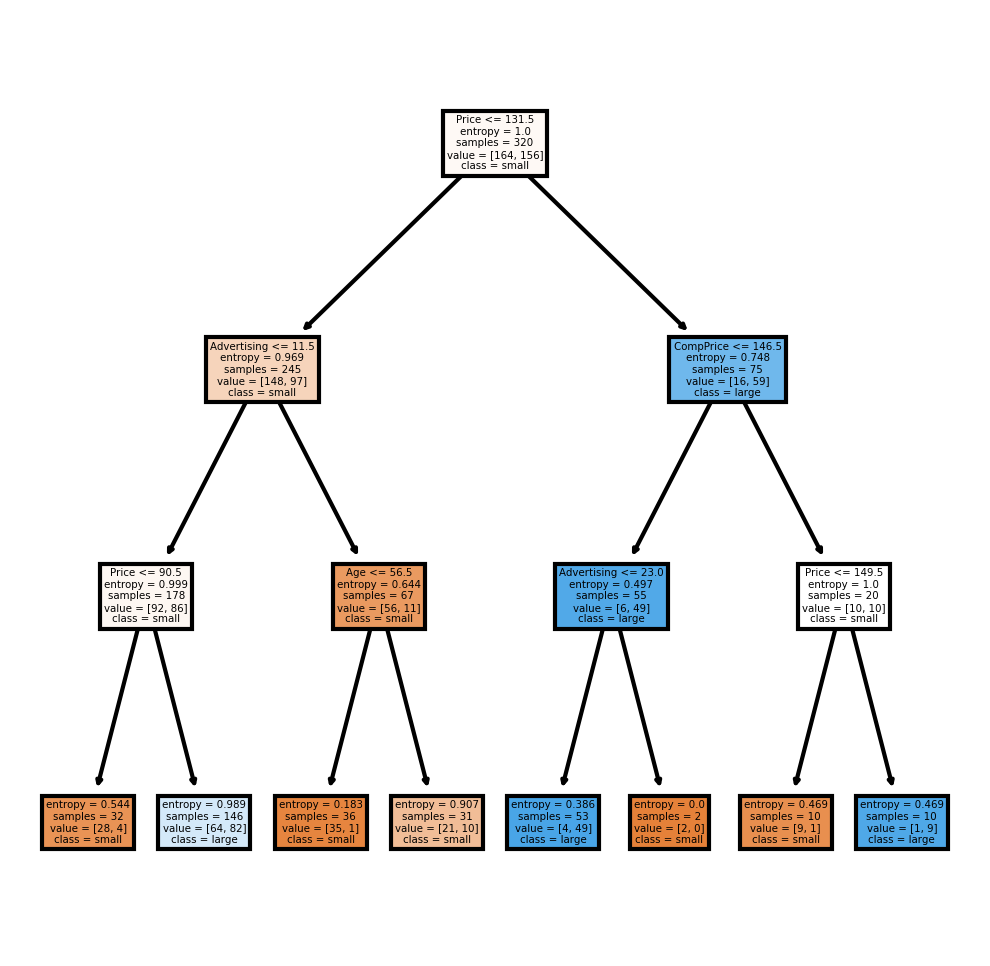

In [36]:
fn=['CompPrice','Income','Advertising','Population','Price','ShelveLoc','Age','Education','Urban','US']
cn=['small', 'large']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [37]:
#Predicting on test data
preds = model.predict(x_test) # predicting on test data set 
pd.Series(preds).value_counts() # getting the count of each category 

small    56
large    24
dtype: int64

In [41]:
preds

array(['small', 'small', 'small', 'small', 'small', 'large', 'large',
       'large', 'small', 'large', 'small', 'small', 'small', 'large',
       'small', 'small', 'large', 'small', 'small', 'small', 'large',
       'small', 'small', 'large', 'small', 'small', 'small', 'small',
       'large', 'small', 'large', 'small', 'large', 'large', 'small',
       'large', 'small', 'small', 'small', 'small', 'small', 'small',
       'small', 'small', 'small', 'large', 'small', 'small', 'small',
       'small', 'small', 'small', 'large', 'small', 'small', 'large',
       'large', 'small', 'large', 'small', 'small', 'small', 'large',
       'small', 'small', 'small', 'small', 'small', 'small', 'large',
       'large', 'large', 'small', 'small', 'large', 'small', 'small',
       'small', 'small', 'large'], dtype=object)

In [42]:
pd.crosstab(y_test,preds) # getting the 2 way table to understand the correct and wrong predictions

col_0,large,small
sales,,
large,17,18
small,7,38


In [43]:
# Accuracy 
np.mean(preds==y_test)

0.6875

### Building Decision Tree Classifier (CART) using Gini Criteria

In [44]:
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=3)

In [45]:
model_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [46]:
#Prediction and computing the accuracy
pred=model.predict(x_test)
np.mean(preds==y_test)

0.6875

#### Decision Tree Regression Example

In [47]:
# Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor

In [49]:
array = Company.values
X = array[:,0:3]
y = array[:,3]

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

In [51]:
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

DecisionTreeRegressor()

In [52]:
#Find the accuracy
model.score(X_test,y_test)

-0.9596893050253175